In [1]:
from Hilbert2D import Hilbert2D
from Hilbert3D import Hilbert3D

2D Hilbert výpočty

In [2]:

h2d = Hilbert2D(15)

Q = h2d.dec_to_quarter(0.2)
print("Quarter Q:", Q)

e0, dj = h2d.ej_and_dj_counter(Q)
result = h2d.calculate_point(e0, dj, Q)
print("Calculated point:", result)


Quarter Q: [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0]
Calculated point: [[0.20001221]
 [0.40002441]]


In [3]:

h = [2, 0, 3]
e0, dj = h2d.ej_and_dj_counter(h)
print("e0:", e0)
print("dj:", dj)

result = h2d.calculate_point(e0, dj, h)
print("Point from [2,0,3]:", result)

e0: [0. 0. 1.]
dj: [0. 0. 1.]
Point from [2,0,3]: [[0.625]
 [0.75 ]]


2D Hilbert minima

In [4]:

for n in [2,3,4,5,6,7,8]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum(n)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

precision=  2  =>  t = 0.387500,  h(t) = (0.2998, 0.8496),  f = 1.011192
precision=  3  =>  t = 0.375001,  h(t) = (0.2510, 0.7500),  f = 1.002452
precision=  4  =>  t = 0.378125,  h(t) = (0.3008, 0.7754),  f = 1.002842
precision=  5  =>  t = 0.377539,  h(t) = (0.3018, 0.8115),  f = 1.006220
precision=  6  =>  t = 0.376954,  h(t) = (0.2812, 0.7812),  f = 1.003477
precision=  7  =>  t = 0.378661,  h(t) = (0.2969, 0.7510),  f = 1.001304
precision=  8  =>  t = 0.382246,  h(t) = (0.3291, 0.7842),  f = 1.003967


2D Hilbert min s Holder. alg.

In [5]:
h2d = Hilbert2D(50)


H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10] 
max_iter = 100

for n in N:
    t_min, f_min, x_min, y_min = h2d.Holder_algorithm(H, r, eps, max_iter,n)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (0.34105002880096436, 0.9716101139783859)
  Hodnota f: 1.037728579439956
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (0.28916484117507935, 0.8653452470898628)
  Hodnota f: 1.0137282257009845
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (0.2636658102273941, 0.7546705529093742)
  Hodnota f: 1.0021545213509242
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.2774161249399185, 0.6927864477038383)
  Hodnota f: 1.0002810333747294
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (0.30083686113357544, 0.681640699505806)
  Hodnota f: 1.0001688821255965
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (0.3044735714793205, 0.695576474070549)
  Hodnota f: 1.0000197902117145
----------------------------------------
Iterace hilbertovy kři

3D Hilbert

In [6]:
h3d = Hilbert3D(20)


h2d_converter = Hilbert3D(20)
L = h2d_converter.dec_to_octal(0.2)
print("Octal L:", L)

h = [2, 0, 6]
result = h3d.ThreeD_Hilbert(h)
print("3D result:", result)




Octal L: [1, 4, 6, 3, 1, 4, 6, 3, 1, 4, 6, 3, 1, 4, 6, 3, 1, 5, 0, 0]
[2, 0, 6]
3D result: [0.625 0.75  0.125]


Bod na aproximačním polygonu: [0.2 0. ]


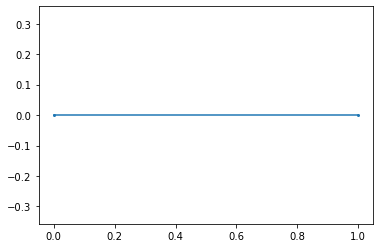

[1. 0.]


In [7]:
n = 0 
t = 0.2  

bod_na_polygonu = h2d.hilbert_polygon_point(t,n)
print("Bod na aproximačním polygonu:", bod_na_polygonu)

h2d.plot_hilbert_polygon(n)  
print(h2d.hilbert_polygon_point(1.0,n))

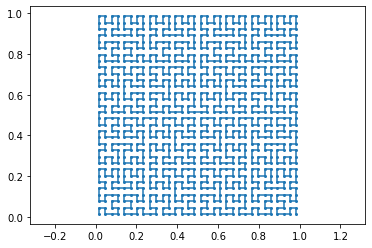

In [8]:
h2da = Hilbert2D(15)
h2da.plot_mainstream_hilbert_polygon(5)  


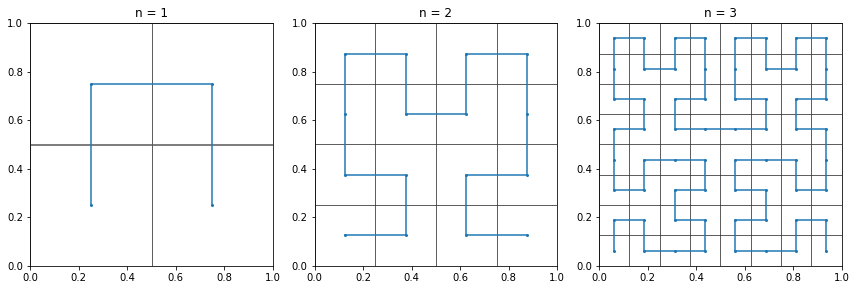

In [9]:
h2da.plot_multiple_hilberts([1, 2, 3])

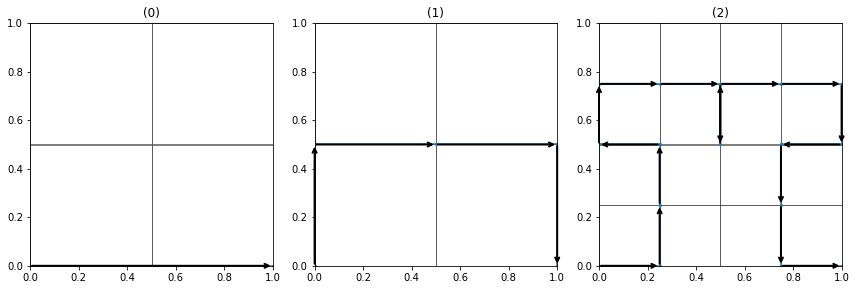

In [10]:
h2da.plot_multiple_hilberts_arrows([0, 1, 2])

In [11]:
for n in [2,3,4,5,6,7,8]:
    h3d = Hilbert3D(10)
    t_min, h_min, f_min = h3d.find_minimum(n)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}, {h_min[2]:.4f}),  f = {f_min:.6f}")

0.3819660112501051
24
64
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0.5 0.5 0.5]
[0.5  0.5  0.25]
0.6180339887498948
39
64
[4, 7, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.5  0.5  0.75]
[0.5 0.5 0.5]
0.2360679774997897
15
64
[1, 7, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.5  0.75 0.  ]
[0.5 0.5 0. ]
0.14589803375031546
9
64
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[0.   0.75 0.  ]
[0.   0.75 0.25]
0.22689754500432663
14
64
[1, 6, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 7, 0, 0, 0, 0, 0, 0, 0, 0]
[0.5  0.75 0.25]
[0.5  0.75 0.  ]
0.29179606750063086
18
64
[2, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[0.75 0.75 0.  ]
[0.75 0.75 0.25]
0.25735421375199785
16
64
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0.5 0.5 0. ]
[0.5  0.75 0.  ]
0.24073911163615822
15
64
[1, 7, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.5  0.75 0.  ]
[0.5 0.5 0. ]
0.2325651839780593
14
64
[1, 6, 0, 0, 0, 0,

In [12]:
h3d = Hilbert3D(50)


H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10] 
max_iter = 100

for n in N:
    t_min, f_min, x_min, y_min, z_min = h3d.Holder_algorithm(H, r, eps, max_iter,n)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min}, {z_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

0
0
8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0. 0. 0.]
[0.  0.5 0. ]
1
8
8
[0. 0. 1.]
[0. 0. 0.]
[1.29, 2.29]
0.04090909090909095
0
8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0. 0. 0.]
[0.  0.5 0. ]
0.07995867768595044
0
8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [13]:
print(h3d.hilbert_polygon_point(0.999999999995,2))

0.999999999995
63
64
[7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.   0.   0.75]
[0. 0. 1.]
[0. 0. 1.]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 5, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 6, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 7, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 5, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 6, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 7, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 5, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 6, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 7, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 5, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 6, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 7, 0, 0, 0, 0, 0, 0, 0]
[0, 4, 0

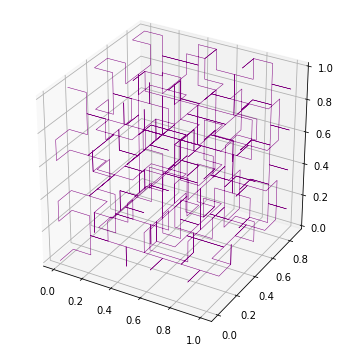

0.0
0
4096
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0. 0. 0.]
[0.     0.     0.0625]
0.000244140625
1
4096
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[0.     0.     0.0625]
[0.0625 0.     0.0625]
0.00048828125
2
4096
[0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 0, 0]
[0.0625 0.     0.0625]
[0.0625 0.0625 0.0625]
0.000732421875
3
4096
[0, 0, 0, 3, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0]
[0.0625 0.0625 0.0625]
[0.125  0.0625 0.0625]
0.0009765625
4
4096
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 0, 0, 0, 0, 0]
[0.125  0.0625 0.0625]
[0.0625 0.0625 0.0625]
0.001220703125
5
4096
[0, 0, 0, 5, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 6, 0, 0, 0, 0, 0, 0]
[0.0625 0.0625 0.0625]
[0.0625 0.125  0.0625]
0.00146484375
6
4096
[0, 0, 0, 6, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 7, 0, 0, 0, 0, 0, 0]
[0.0625 0.125  0.0625]
[0.     0.125  0.0625]
0.001708984375
7
4096
[0, 0, 0, 7, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0.     0.125  0.0625]
[0.    0.1

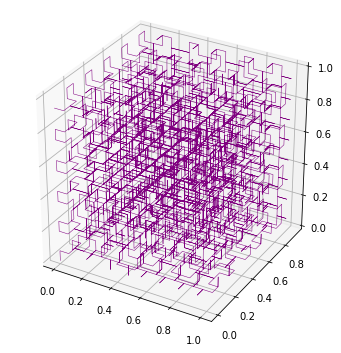

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 5, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 6, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 7, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 5, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 6, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 7, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 5, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 6, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 7, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 5, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 6, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 7, 0, 0, 0, 0, 0, 0, 0]
[0, 4, 0

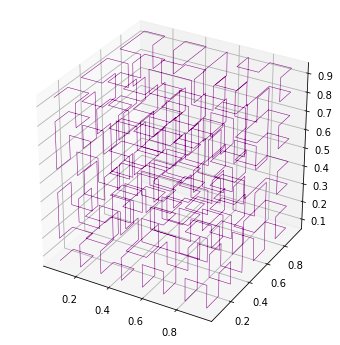

In [14]:
hilbert = Hilbert3D(10)
hilbert.plot_hilbert_curve(3)
hilbert.plot_hilbert_polygon(4)
hilbert.plot_mainstream_hilbert(3)